In [33]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
pass_data = pd.read_csv('rainfall in india 1901-2015.csv',  thousands='.', decimal=',', sep=',')
pass_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,4920.0,8710.0,2920.0,230.0,52880.0,51750.0,36510.0,48110.0,33260.0,38850.0,55820.0,3360.0,337320.0,13630.0,56030.0,169630.0,98030.0
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,15980.0,1220.0,0.0,44610.0,53710.0,22890.0,75370.0,66620.0,19720.0,35900.0,16050.0,352070.0,15980.0,45830.0,218590.0,71670.0
2,ANDAMAN & NICOBAR ISLANDS,1903,1270.0,14400.0,0.0,100.0,23510.0,47990.0,72840.0,32670.0,33900.0,18120.0,28440.0,22500.0,295740.0,15670.0,23610.0,187400.0,69060.0
3,ANDAMAN & NICOBAR ISLANDS,1904,940.0,1470.0,0.0,20240.0,30450.0,49510.0,50200.0,16010.0,82040.0,22220.0,30870.0,4010.0,307960.0,2410.0,50690.0,197760.0,57100.0
4,ANDAMAN & NICOBAR ISLANDS,1905,130.0,0.0,330.0,2690.0,27950.0,62870.0,36870.0,33050.0,29700.0,26070.0,2540.0,34470.0,256670.0,130.0,30970.0,162490.0,63080.0


In [34]:
pass_data['ANNUAL'] = pass_data['Jan-Feb'] + pass_data['Mar-May']+ pass_data['Jun-Sep']+ pass_data['Oct-Dec']
pass_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,4920.0,8710.0,2920.0,230.0,52880.0,51750.0,36510.0,48110.0,33260.0,38850.0,55820.0,3360.0,337320.0,13630.0,56030.0,169630.0,98030.0
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,15980.0,1220.0,0.0,44610.0,53710.0,22890.0,75370.0,66620.0,19720.0,35900.0,16050.0,352070.0,15980.0,45830.0,218590.0,71670.0
2,ANDAMAN & NICOBAR ISLANDS,1903,1270.0,14400.0,0.0,100.0,23510.0,47990.0,72840.0,32670.0,33900.0,18120.0,28440.0,22500.0,295740.0,15670.0,23610.0,187400.0,69060.0
3,ANDAMAN & NICOBAR ISLANDS,1904,940.0,1470.0,0.0,20240.0,30450.0,49510.0,50200.0,16010.0,82040.0,22220.0,30870.0,4010.0,307960.0,2410.0,50690.0,197760.0,57100.0
4,ANDAMAN & NICOBAR ISLANDS,1905,130.0,0.0,330.0,2690.0,27950.0,62870.0,36870.0,33050.0,29700.0,26070.0,2540.0,34470.0,256670.0,130.0,30970.0,162490.0,63080.0


In [35]:
subs = pass_data['SUBDIVISION'].unique()
print (subs)
print ('Total subdivisions: ', len(subs))

['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']
Total subdivisions:  36


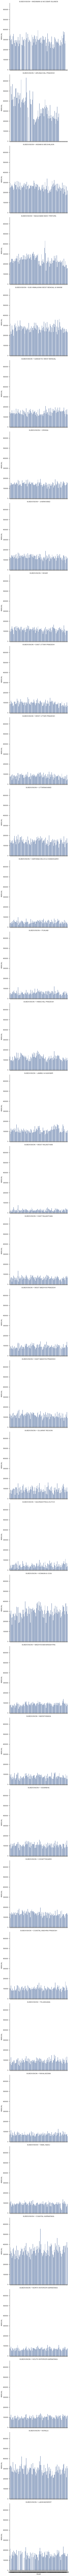

In [36]:
import seaborn as sns
sns.set(style="ticks")
g = sns.FacetGrid(data = pass_data, col = 'SUBDIVISION', col_wrap = 1, height = 7)
g.map_dataframe(sns.barplot, x ="YEAR",y="ANNUAL")

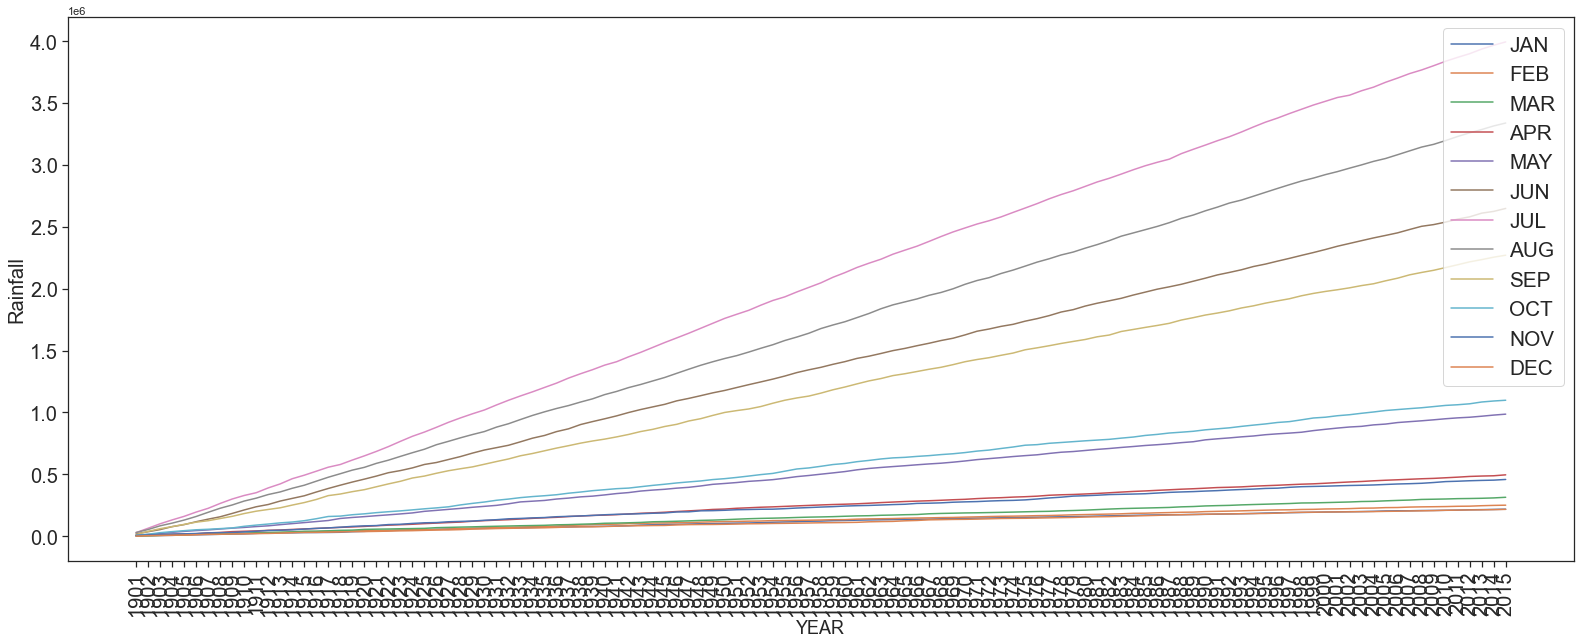

In [61]:
import numpy as np
months = pass_data.columns[2:14]
fig = plt.figure(figsize=(27,10))
subs = pass_data['YEAR'].unique()
subs.sort()
ax = fig.add_subplot(111)
df = pass_data.groupby('YEAR').mean()[months]
df = df.cumsum( axis = 0)
df.plot.line(ax = ax, fontsize=20)
plt.xticks(np.linspace(1901,2015,115,endpoint=True),subs)
plt.legend(loc='upper right', fontsize = 'xx-large')
plt.ylabel('Rainfall')
plt.xticks( rotation = 90)
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(20)

In [38]:
pass_data.groupby(['SUBDIVISION'])['YEAR'].count().sort_values(ascending = True)

SUBDIVISION
ARUNACHAL PRADESH                      97
ANDAMAN & NICOBAR ISLANDS             110
LAKSHADWEEP                           114
VIDARBHA                              115
UTTARAKHAND                           115
TELANGANA                             115
TAMIL NADU                            115
SUB HIMALAYAN WEST BENGAL & SIKKIM    115
MADHYA MAHARASHTRA                    115
SAURASHTRA & KUTCH                    115
RAYALSEEMA                            115
PUNJAB                                115
ORISSA                                115
NORTH INTERIOR KARNATAKA              115
NAGA MANI MIZO TRIPURA                115
MATATHWADA                            115
WEST MADHYA PRADESH                   115
SOUTH INTERIOR KARNATAKA              115
KONKAN & GOA                          115
KERALA                                115
ASSAM & MEGHALAYA                     115
BIHAR                                 115
CHHATTISGARH                          115
COASTAL ANDHRA PRADESH

In [39]:
lowest_sub = pass_data.groupby(['SUBDIVISION'])['YEAR'].count().sort_values(ascending = True).index.values[0]
print ('the state with the least number of observations: ', lowest_sub)

the state with the least number of observations:  ARUNACHAL PRADESH


In [40]:
fd = pass_data.groupby(by='SUBDIVISION').sum()[['ANNUAL']].sort_values( by = 'ANNUAL', ascending = False)
fd

,ANNUAL
SUBDIVISION,
COASTAL KARNATAKA,38855880.0
KONKAN & GOA,34243370.0
KERALA,33642910.0
SUB HIMALAYAN WEST BENGAL & SIKKIM,31650560.0
ARUNACHAL PRADESH,31111680.0
ANDAMAN & NICOBAR ISLANDS,30445380.0
ASSAM & MEGHALAYA,29678130.0
NAGA MANI MIZO TRIPURA,27986640.0
GANGETIC WEST BENGAL,17140570.0


In [41]:
highest_sub = fd.index.values[0]
lowest_sub = fd.index.values[-1]
print ('Highest rain in: ', highest_sub)
print ('Lowest rain in: ', lowest_sub)

Highest rain in:  COASTAL KARNATAKA
Lowest rain in:  WEST RAJASTHAN


<AxesSubplot:xlabel='SUBDIVISION', ylabel='ANNUAL'>

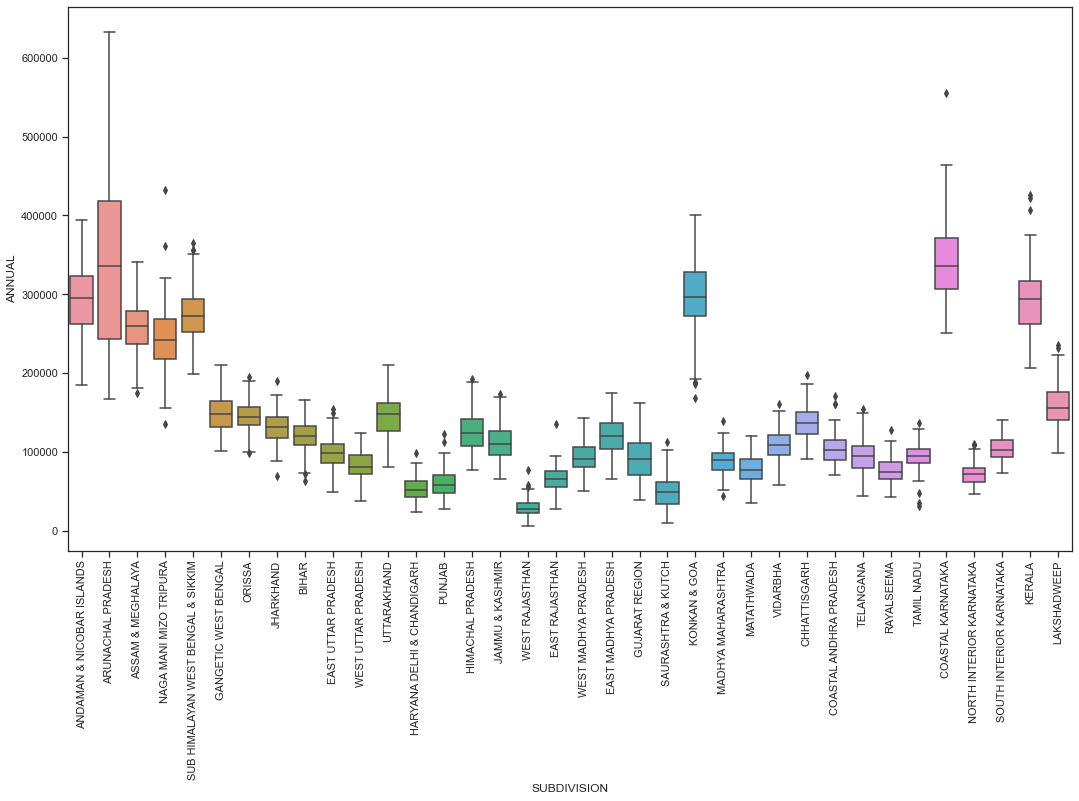

In [42]:
fig = plt.figure(figsize=(18, 10))
plt.xticks(rotation='vertical')
sns.boxplot(x = 'SUBDIVISION', y = 'ANNUAL', data = pass_data)

In [43]:
#корелляция Пирсона
print('Pirson correlation coefficient: %.3f' % pass_data['NOV'].corr(pass_data['MAR'], method='pearson'))

Pirson correlation coefficient: 0.009


In [44]:
from scipy.stats import spearmanr
#коряляция Спирмена
print('Spearman correlation coefficient: %.3f' % pass_data['NOV'].corr(pass_data['MAR'], method='spearman'))

Spearman correlation coefficient: 0.143


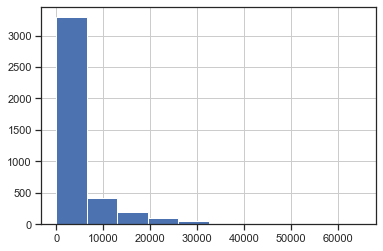

In [45]:
h = pass_data['NOV'].hist()
fig = h.get_figure()

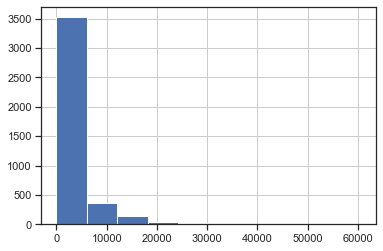

In [46]:
h = pass_data['MAR'].hist()
fig = h.get_figure()